In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.shape

(9800, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
#Check for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
#Only Burlington has missing values so after searching its postal code, found 5401 and keeping 5401 for allnull values.
df['Postal Code']=df['Postal Code'].fillna(5401)

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
#Check for duplicate values
df[df.duplicated()].sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code      0.0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales            0.0
dtype: object

In [11]:
##change data type of postal code from float to int
df['Postal Code']=df['Postal Code'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
#change data type of Order Date and Ship Date from object to Datetime
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Text(0, 0.5, 'Total Order')

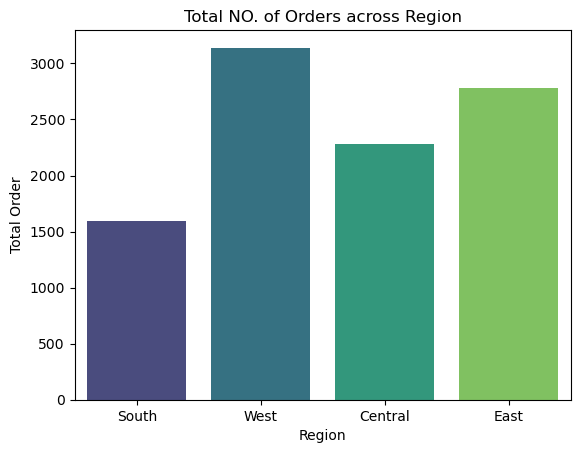

In [16]:
#Total orders in different regions
sns.countplot(x='Region',data=df,palette='viridis')
plt.title("Total NO. of Orders across Region")
plt.ylabel('Total Order')

Text(0.5, 1.0, 'Number of order across segment')

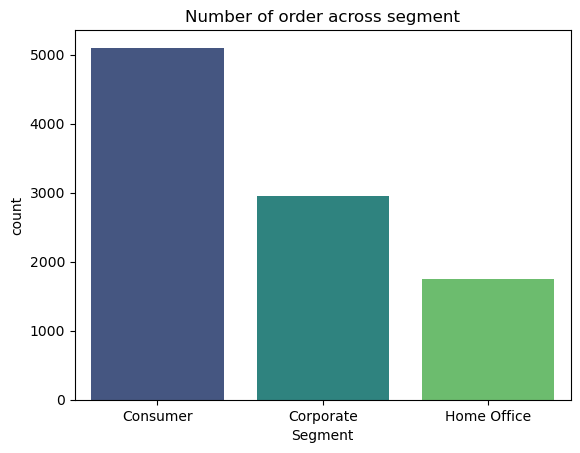

In [17]:
#Total orders in different segment
sns.countplot(x='Segment',data=df,palette='viridis')
plt.title('Number of order across segment')

Text(0.5, 1.0, 'Total numbers of orders across category')

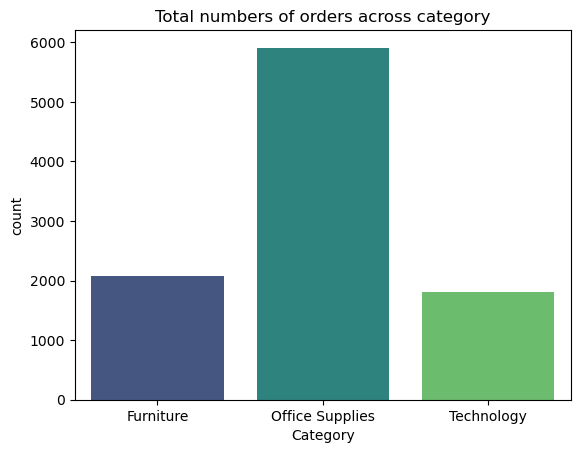

In [18]:
#Total orders in different categories
sns.countplot(x='Category',data=df,palette='viridis')
plt.title("Total numbers of orders across category")

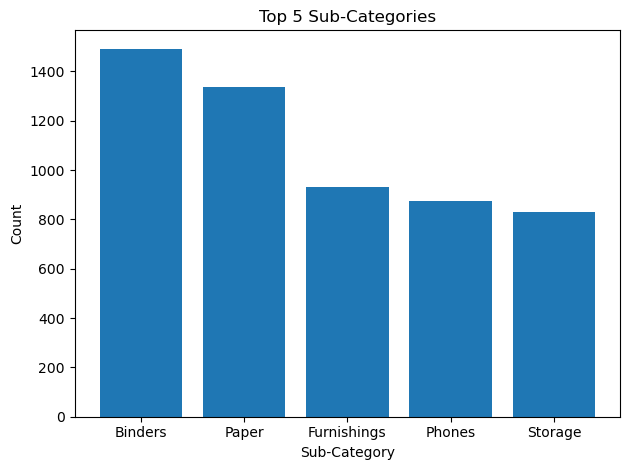

In [19]:
#Highest no. of orders in sub-categories
top5=df['Sub-Category'].value_counts().head(5)
top5
plt.figure()
plt.bar(top5.index, top5.values)
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.title("Top 5 Sub-Categories")
plt.tight_layout()
plt.show()


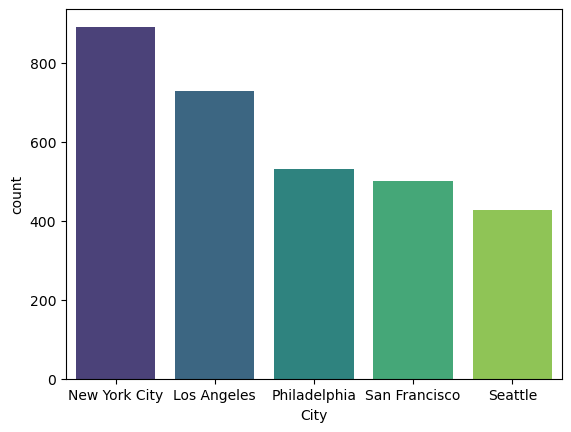

In [20]:
#Highest no. of orders in cities
df1=df['City'].value_counts().head(5).index
sns.countplot(x='City',data=df,order=df1,palette='viridis')
plt.show()

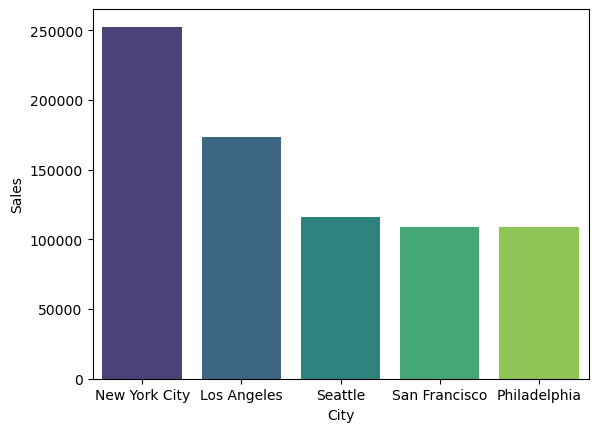

In [21]:
#Distribution of sales across different city
highest_sales=df.groupby(['City'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)
sns.barplot(x='City',y='Sales',data=highest_sales,palette='viridis')   
plt.show()

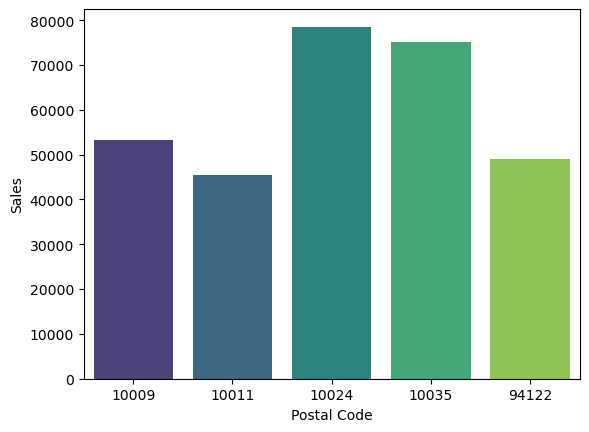

In [22]:
#Distribution of sales across different postal code
highest_sales= df.groupby(['Postal Code'], as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(5)
sns.barplot(x='Postal Code', y='Sales', data=highest_sales,palette='viridis')
plt.show()

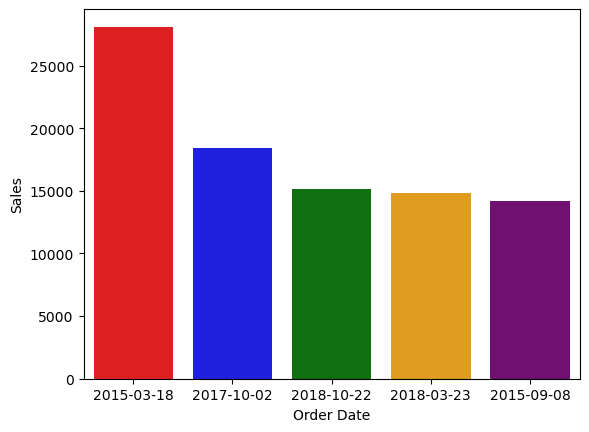

In [23]:
#Distribution of sales across different order date
highest_sales= df.groupby(['Order Date'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(5)
colors=['red','blue','green','orange','purple']
sns.barplot(x='Order Date', y='Sales', data=highest_sales,palette=colors)
plt.show()

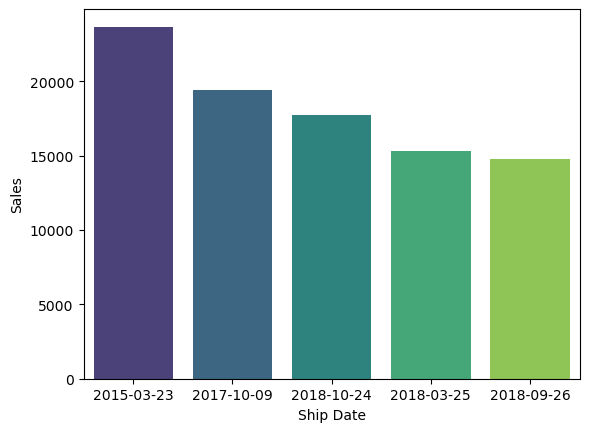

In [24]:
#Distribution of sales across different ship date
highest_sales= df.groupby(['Ship Date'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(5)
sns.barplot(x='Ship Date', y='Sales', data=highest_sales,palette='viridis')
plt.show()

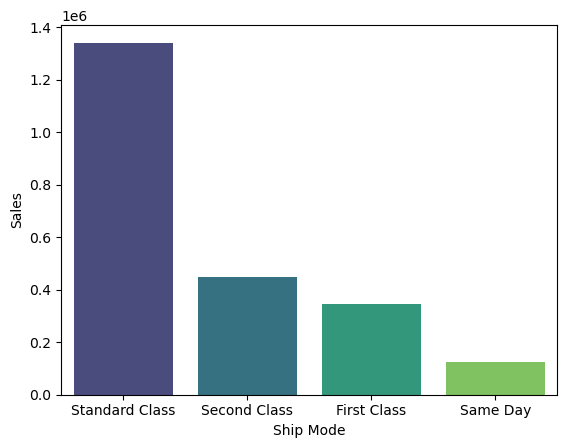

In [25]:
#Distribution of sales across different ship mode
highest_sales=df.groupby(['Ship Mode'],as_index=False)['Sales'].sum().sort_values('Sales',ascending=False).head(5)
sns.barplot(x='Ship Mode',y='Sales',data=highest_sales,palette='viridis')
plt.show()


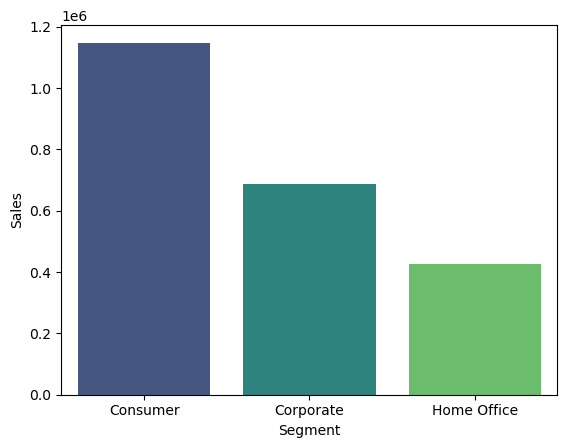

In [26]:
#Distribution of sales across different segment
highest_sales= df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(5)
sns.barplot(x='Segment', y='Sales', data=highest_sales,palette='viridis')
plt.show()

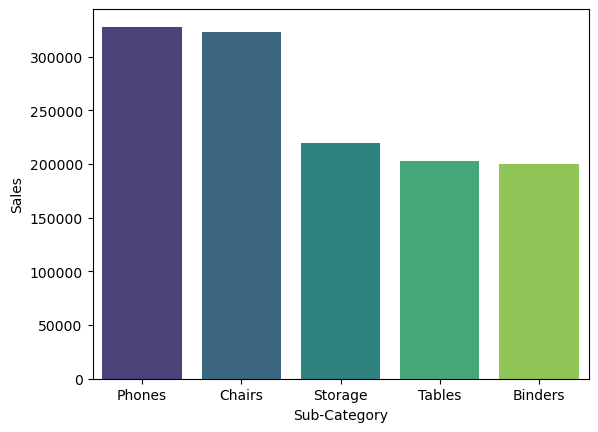

In [27]:
#Distribution of sales across different sub-category
highest_sales= df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(5)
sns.barplot(x='Sub-Category', y='Sales', data=highest_sales,palette='viridis')
plt.show()

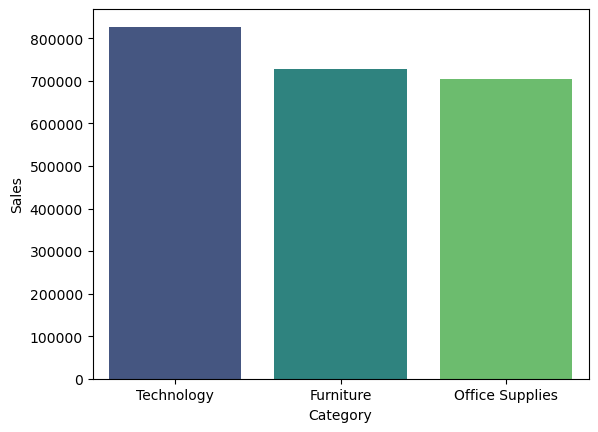

In [28]:
#Distribution of sales across different category
highest_sales= df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(5)
sns.barplot(x='Category', y='Sales', data=highest_sales,palette='viridis')
plt.show()

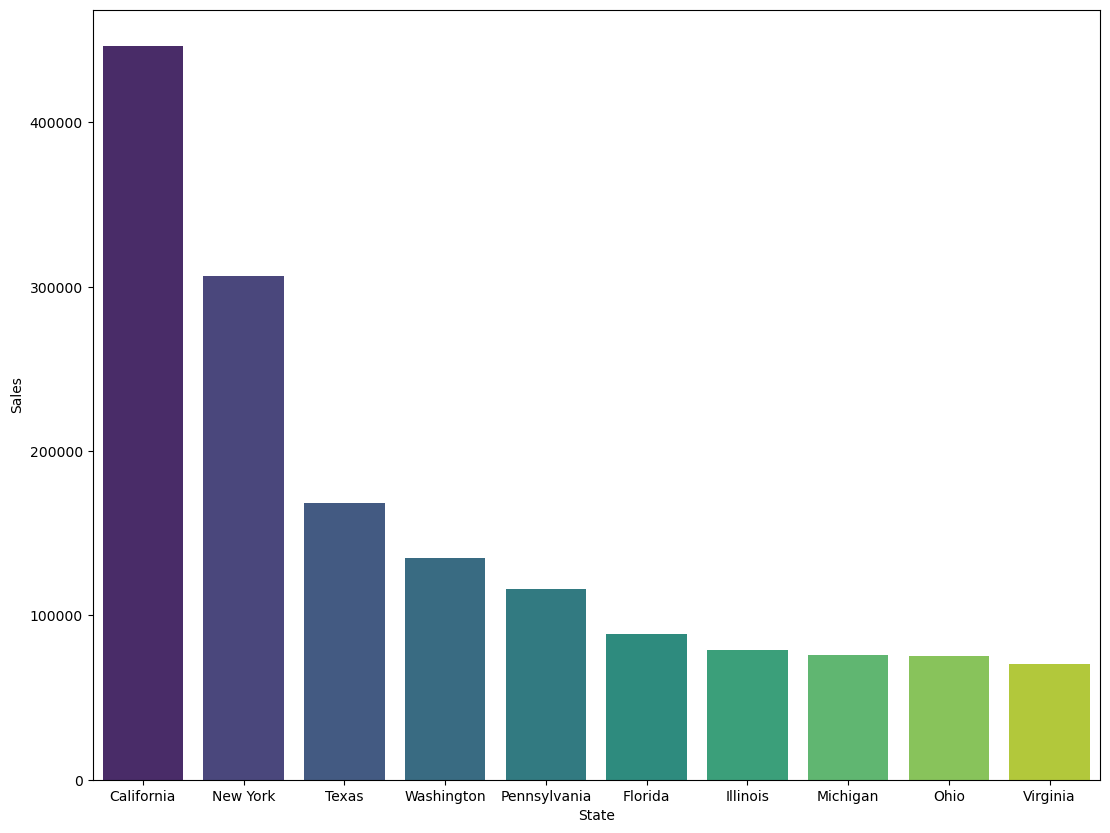

In [29]:
#Distribution of sales across different state
plt.figure(figsize=(13,10))
highest_sales= df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
sns.barplot(x='State', y='Sales', data=highest_sales,palette='viridis')
plt.show()

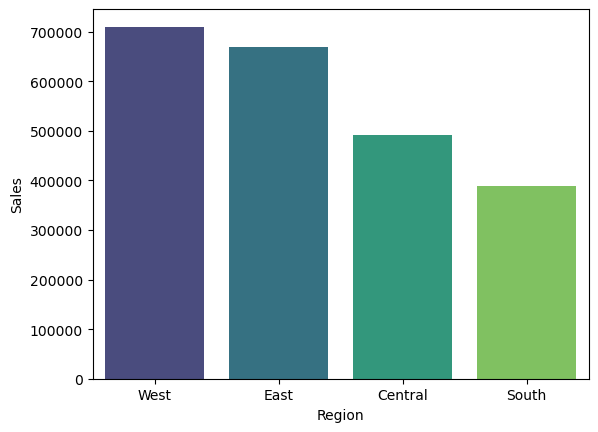

In [30]:
#Distribution of sales across different Region
highest_sales= df.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sns.barplot(x='Region', y='Sales', data=highest_sales,palette='viridis')
plt.show()

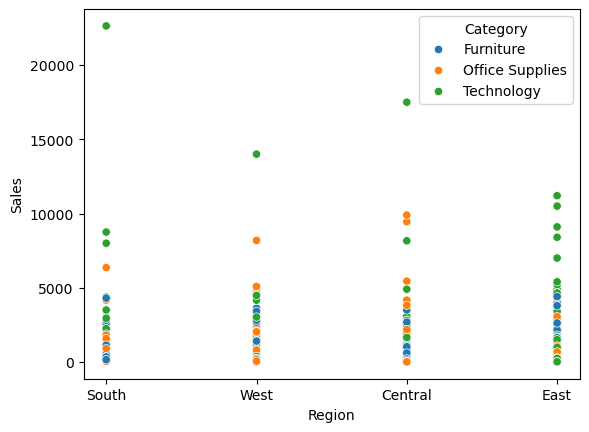

In [31]:
#Distribution of sales across different region and category
sns.scatterplot(x='Region',y='Sales',hue='Category',data=df)
plt.show()

In [32]:
#create new columns from order date, split order date to day, month and year
df['Day']=df['Order Date'].dt.day
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year

In [33]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day,Month,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016


In [34]:
df['Year'] = df['Year'].astype('str')

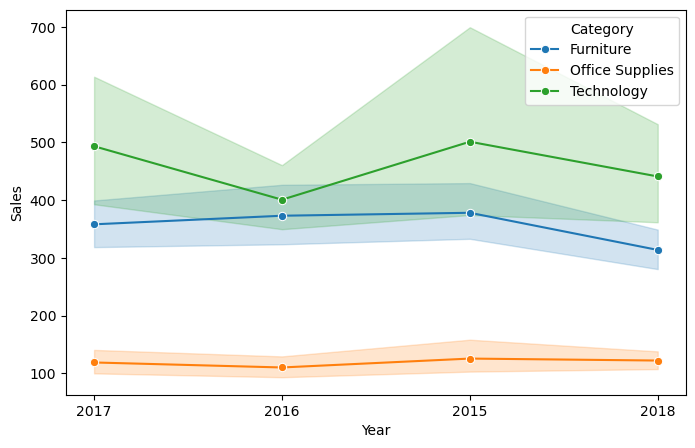

In [35]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Sales',hue='Category', data=df,marker='o')
plt.show()

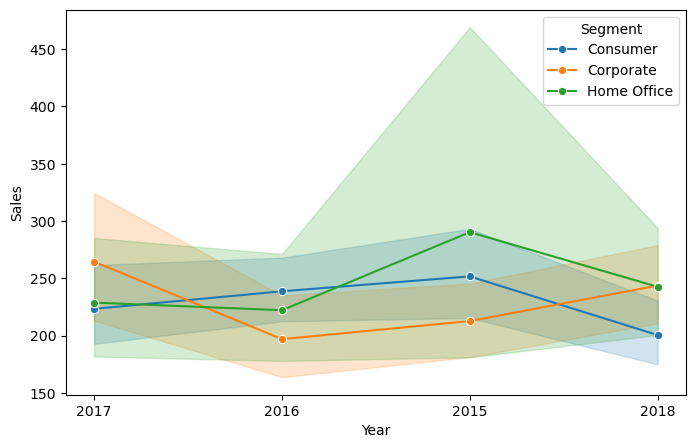

In [36]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Sales',hue='Segment', data=df,marker='o')
plt.show()